# Nov 16th, 2022 (AD: mega animal)

**Motivation**: generated DKI results using ses 3 and 4 only <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Dirs

In [2]:
raw_dir = '/mnt/storage/hadi/Ca-fMRI/raw'

## sub-DKI11

In [3]:
sub = 'DKI11'
files = sorted([
    f for f in os.listdir(raw_dir)
    if f"sub-{sub}" in f
])
files

[
    'sub-DKI11_ses-1_acq-FLASH_T1w.nii.gz',
    'sub-DKI11_ses-1_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-1_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-1_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-2_acq-FLASH_T1w.nii.gz',
    'sub-DKI11_ses-2_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-2_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-2_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
]

## N162

In [4]:
path = '/mnt/storage/hadi/Ca-fMRI/Hadi_AD'
path = pjoin(path, 'preprocess_outputs/bold_datasink/commonspace_resampled_template')
n162 = ants.image_read(pjoin(path, 'resampled_template.nii.gz'))
n162

ANTsImage (LPI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (60, 46, 81)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (18.2, 2.8, -7.8)
         Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

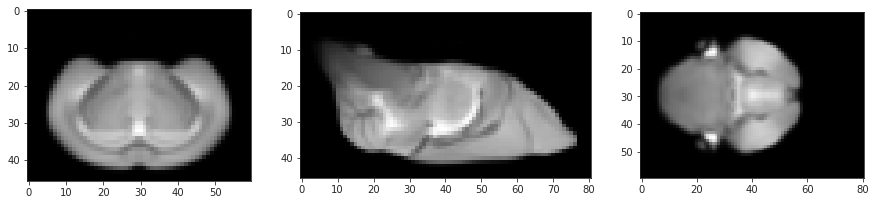

In [9]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[30], cmap='Greys_r')
axes[2].imshow(n162[:, 16, :], cmap='Greys_r')
plt.show()

In [10]:
roi = np.load(pjoin(tmp_dir, 'ROI_SanDiego.npy'))

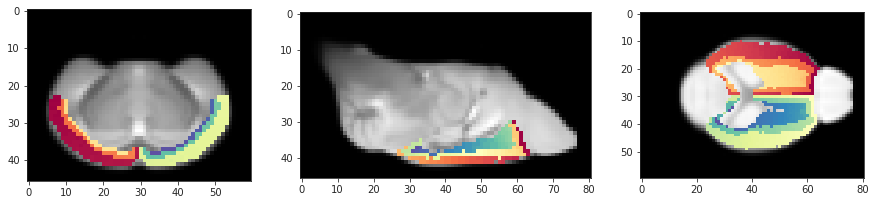

In [11]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[26], cmap='Greys_r')
axes[2].imshow(n162[:, 36, :], cmap='Greys_r')

axes[0].imshow(mwh(roi[:, :, 40].T == 0, roi[:, :, 40].T), cmap='Spectral')
axes[1].imshow(mwh(roi[26] == 0, roi[26]), cmap='Spectral')
axes[2].imshow(mwh(roi[:, 36, :] == 0, roi[:, 36, :]), cmap='Spectral')

plt.show()

## Extract data

In [12]:
sub = 'DKI11'
files = sorted([
    f for f in os.listdir(raw_dir)
    if f"sub-{sub}" in f and 'T1w' not in f
])
files

[
    'sub-DKI11_ses-1_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-1_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-1_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-2_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-2_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-2_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
]

In [13]:
data = []
for f in files:
    data.append(ants.image_read(pjoin(raw_dir, f)).numpy())
data = np.concatenate(data, axis=-1)
data.shape

(60, 46, 81, 1812)

In [14]:
m = np.abs(data).sum(-1) > 0

In [18]:
mice = Mice(512)
mice.set_band(band_bo=(0.008,0.2))

regions = []
for n, lbl in mice.node_lookup['ca2'].items():
    regions.append(mice.parcel.encode(lbl))
regions = np.array(regions)
len(regions)

combine metadata not found, time to run cat_data() . . .

542

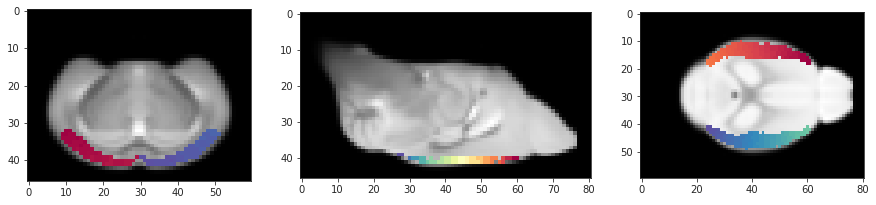

In [19]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[26], cmap='Greys_r')
axes[2].imshow(n162[:, 36, :], cmap='Greys_r')

axes[0].imshow(mwh(~np.isin(roi[:, :, 40].T, regions), roi[:, :, 40].T), cmap='Spectral')
axes[1].imshow(mwh(~np.isin(roi[26], regions), roi[26]), cmap='Spectral')
axes[2].imshow(mwh(~np.isin(roi[:, 36, :], regions), roi[:, 36, :]), cmap='Spectral')

plt.show()

## Xtract

In [22]:
m_ctx = np.isin(roi, regions)
m_ctx.shape

(60, 46, 81)

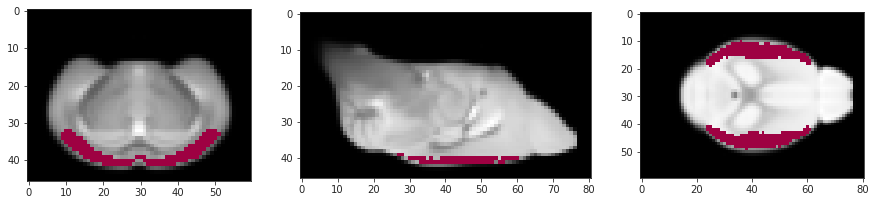

In [23]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[26], cmap='Greys_r')
axes[2].imshow(n162[:, 36, :], cmap='Greys_r')

axes[0].imshow(mwh(m_ctx[:, :, 40].T == 0, m_ctx[:, :, 40].T), cmap='Spectral')
axes[1].imshow(mwh(m_ctx[26] == 0, m_ctx[26]), cmap='Spectral')
axes[2].imshow(mwh(m_ctx[:, 36, :] == 0, m_ctx[:, 36, :]), cmap='Spectral')

plt.show()

In [25]:
x = []
for r in regions:
    x.append(np.nanmean(data[roi == r], 0, keepdims=True))
x = np.concatenate(x)
x.shape

(542, 1812)

In [26]:
a, p = get_adj_mat(x, 'pearson', p_val=1)

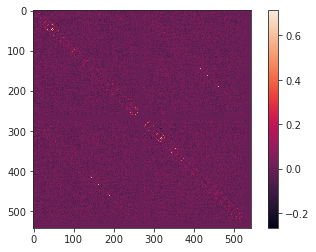

In [27]:
plt.imshow(a)
plt.colorbar();

<AxesSubplot:ylabel='Count'>

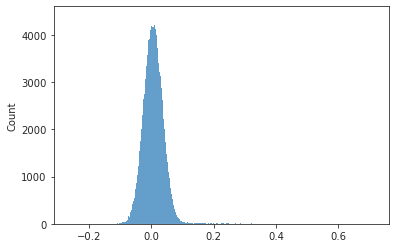

In [28]:
sns.histplot(a[a != 0])

In [30]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0).fit(a)
partition = km.labels_ + 1

In [31]:
bs = Base(mice, mode='ca2')

combine metadata not found, time to run cat_data() . . .

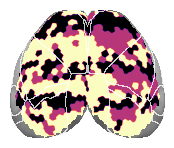

In [33]:
_ = bs.show(partition, vmin=None, vmax=None)

In [37]:
y = np.zeros(data.shape[:3])

for r, p in zip(regions, partition):
    y[roi == r] = p

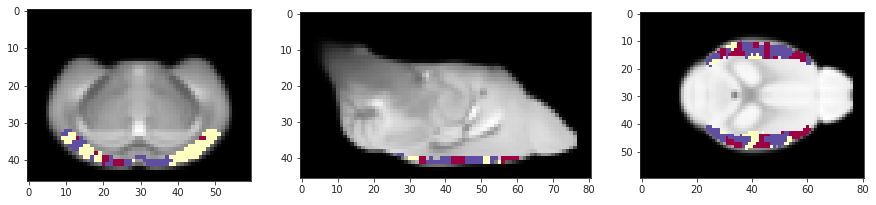

In [38]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[26], cmap='Greys_r')
axes[2].imshow(n162[:, 36, :], cmap='Greys_r')

axes[0].imshow(mwh(y[:, :, 40].T == 0, y[:, :, 40].T), cmap='Spectral')
axes[1].imshow(mwh(y[26] == 0, y[26]), cmap='Spectral')
axes[2].imshow(mwh(y[:, 36, :] == 0, y[:, 36, :]), cmap='Spectral')

plt.show()

## Final

### DKI

In [59]:
sub = 'DKI'
files = sorted([
    f for f in os.listdir(raw_dir) if
    f"sub-{sub}" in f and 'T1w' not in f
])

data = []
for f in files:
    data.append(ants.image_read(pjoin(raw_dir, f)).numpy())
data = np.concatenate(data, axis=-1)

x = []
for r in regions:
    x.append(np.nanmean(data[roi == r], 0, keepdims=True))
x = np.concatenate(x)

In [84]:
a, p = get_adj_mat(x, 'pearson', p_val=1)

k = 5
km = KMeans(n_clusters=k, random_state=0).fit(a)
partition = km.labels_ + 1

y = np.zeros(data.shape[:3])
for r, p in zip(regions, partition):
    y[roi == r] = p

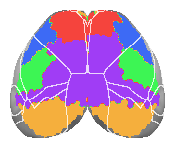

In [85]:
cmap = get_cluster_cmap(range(k))
_ = bs.show(partition, cmap=cmap, vmin=None, vmax=None, interpolation='none')

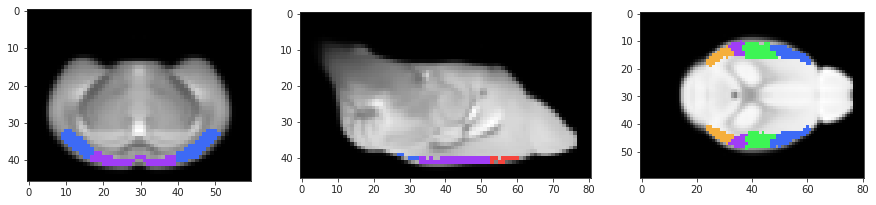

In [86]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[26], cmap='Greys_r')
axes[2].imshow(n162[:, 36, :], cmap='Greys_r')

axes[0].imshow(mwh(y[:, :, 40].T == 0, y[:, :, 40].T), cmap=cmap)
axes[1].imshow(mwh(y[26] == 0, y[26]), cmap=cmap)
axes[2].imshow(mwh(y[:, 36, :] == 0, y[:, 36, :]), cmap=cmap)

plt.show()

### WT

In [87]:
sub = 'WT'
files = sorted([
    f for f in os.listdir(raw_dir) if
    f"sub-{sub}" in f and 'T1w' not in f
])

data = []
for f in tqdm(files):
    data.append(ants.image_read(pjoin(raw_dir, f)).numpy())
data = np.concatenate(data, axis=-1)

x = []
for r in regions:
    x.append(np.nanmean(data[roi == r], 0, keepdims=True))
x = np.concatenate(x)
x.shape

  0%|          | 0/111 [00:00<?, ?it/s]

(542, 33177)

In [88]:
a, p = get_adj_mat(x, 'pearson', p_val=1)

k = 5
km = KMeans(n_clusters=k, random_state=0).fit(a)
partition = km.labels_ + 1

y = np.zeros(data.shape[:3])
for r, p in zip(regions, partition):
    y[roi == r] = p

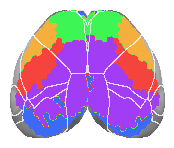

In [89]:
cmap = get_cluster_cmap(range(k))
_ = bs.show(partition, cmap=cmap, vmin=None, vmax=None, interpolation='none')

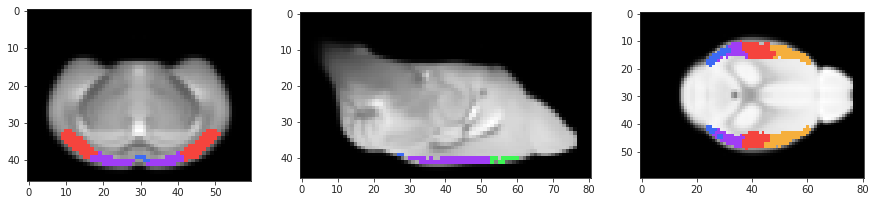

In [90]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[26], cmap='Greys_r')
axes[2].imshow(n162[:, 36, :], cmap='Greys_r')

axes[0].imshow(mwh(y[:, :, 40].T == 0, y[:, :, 40].T), cmap=cmap)
axes[1].imshow(mwh(y[26] == 0, y[26]), cmap=cmap)
axes[2].imshow(mwh(y[:, 36, :] == 0, y[:, 36, :]), cmap=cmap)

plt.show()

### DKI_late

In [92]:
sub = 'DKI'
files = sorted([
    f for f in os.listdir(raw_dir) if
    f"sub-{sub}" in f
    and 'T1w' not in f
    and 'ses-1' not in f
    and 'ses-2' not in f
])

data = []
for f in files:
    data.append(ants.image_read(pjoin(raw_dir, f)).numpy())
data = np.concatenate(data, axis=-1)

x = []
for r in regions:
    x.append(np.nanmean(data[roi == r], 0, keepdims=True))
x = np.concatenate(x)

In [239]:
files

[
    'sub-DKI15_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI15_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI15_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI16_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI16_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI16_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI16_ses-4_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI16_ses-4_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI16_ses-4_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI20_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI20_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI20_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI21_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI21_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI21_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI26_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI26_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI26_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI27_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI27_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI27_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI32_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI32_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI32_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI33_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI33_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI33_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI34_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI34_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI34_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI35_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI35_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI35_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI41_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI41_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI41_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
]

In [96]:
a, p = get_adj_mat(x, 'pearson', p_val=1)

k = 6
km = KMeans(n_clusters=k, random_state=0).fit(a)
partition = km.labels_ + 1

y = np.zeros(data.shape[:3])
for r, p in zip(regions, partition):
    y[roi == r] = p

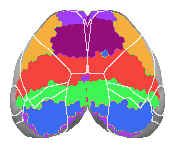

In [97]:
cmap = get_cluster_cmap(range(k))
_ = bs.show(partition, cmap=cmap, vmin=None, vmax=None, interpolation='none')

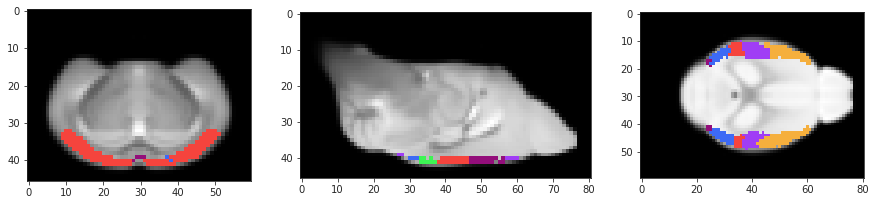

In [98]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[26], cmap='Greys_r')
axes[2].imshow(n162[:, 36, :], cmap='Greys_r')

axes[0].imshow(mwh(y[:, :, 40].T == 0, y[:, :, 40].T), cmap=cmap)
axes[1].imshow(mwh(y[26] == 0, y[26]), cmap=cmap)
axes[2].imshow(mwh(y[:, 36, :] == 0, y[:, 36, :]), cmap=cmap)

plt.show()

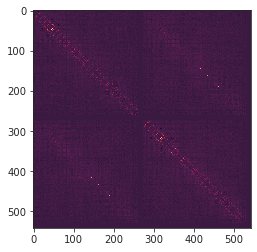

In [101]:
plt.imshow(a);

<AxesSubplot:ylabel='Count'>

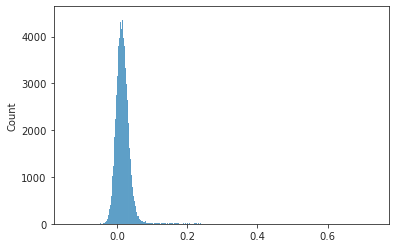

In [102]:
sns.histplot(a[a != 0])

In [119]:
th = calculate_threshold(a, 0.15, verbose=True).pop()
a_bin = dc(a)
a_bin[a <= th] = 0
a_bin[a > th] = 1

threshold = 0.033   /   density:  requested = 0.15000, result = 0.15000;

In [125]:
nan = np.isnan(a_bin).sum(0) == len(a_bin)
zero = np.nanmean(np.abs(a_bin), 0) == 0
good = np.logical_and(~nan, ~zero)
adj_eff = a_bin[good][:, good]

adj_eff.shape, nan.sum(), zero.sum()

((498, 498), 0, 44)

In [126]:
def _adj2graph(adj):
    a = adj.copy()
    a[np.isnan(a)] = 0
    g = nx.from_numpy_array(a)
    return g

In [137]:
a_final = dc(a)
a_final[a <= th] = 0
g = _adj2graph(a_final)

<matplotlib.image.AxesImage object at 0x7f648fbcad60>

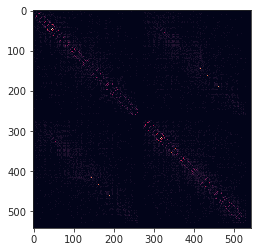

In [143]:
aaa = nx.adjacency_matrix(g).toarray()
plt.imshow(aaa)

<AxesSubplot:ylabel='Count'>

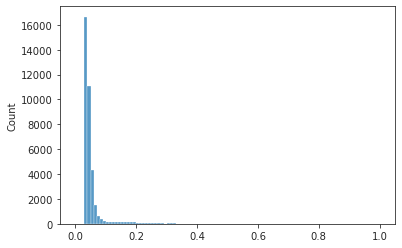

In [146]:
sns.histplot(aaa[aaa != 0], bins=np.linspace(0, 1, 101))

In [149]:
aaa.shape

(542, 542)

In [147]:
path = 'n-512*3_bp(0.008,0.2)_bold-lite_rest_pearson_sub-DKI'
path = pjoin(mice.cfg.svinet_dir, path, 'real')
path

'/home/hadi/Documents/workspaces/svinet/n-512*3_bp(0.008,0.2)_bold-lite_rest_pearson_sub-DKI/real'

In [148]:
save_graph(g, 15, path, 10, verbose=True)

[PROGRESS] 'p15-binary.txt' saved at
/home/hadi/Documents/workspaces/svinet/n-512*3_bp(0.008,0.2)_bold-lite_rest_pearson_sub-DKI/r
eal/p15-binary

[PROGRESS] 'p15-sample.txt' saved at
/home/hadi/Documents/workspaces/svinet/n-512*3_bp(0.008,0.2)_bold-lite_rest_pearson_sub-DKI/r
eal/p15-sample

In [134]:
os.listdir(pjoin(
    mice.cfg.svinet_dir,
    'n-512*3_bp(0.01,0.5)_bold-lite_rest_pearson_sub-SLC06_ses-2_run-3',
    'real',
))

[
    'p35-binary',
    'p25-binary',
    'p15-binary',
    'p5-sample',
    'p35-sample',
    'p25-sample',
    'p20-binary',
    'p10-sample',
    'p30-binary',
    'p15-sample',
    'p5-binary',
    'p30-sample',
    'p10-binary'
]

## Fit SVINET

### K = 7

In [219]:
kwargs = {
    'mice': mice,
    'num_k': 7,
    'key': 'sub-DKI',
    'mode': 'bold-lite',
    'verbpose': True,
}
sv = SVINET(perc='p15-sample', **kwargs)

In [220]:
_ = sv.load_runs()
len(sv._runs[sv.perc])

1000

In [221]:
_ = sv.fit_svinet()

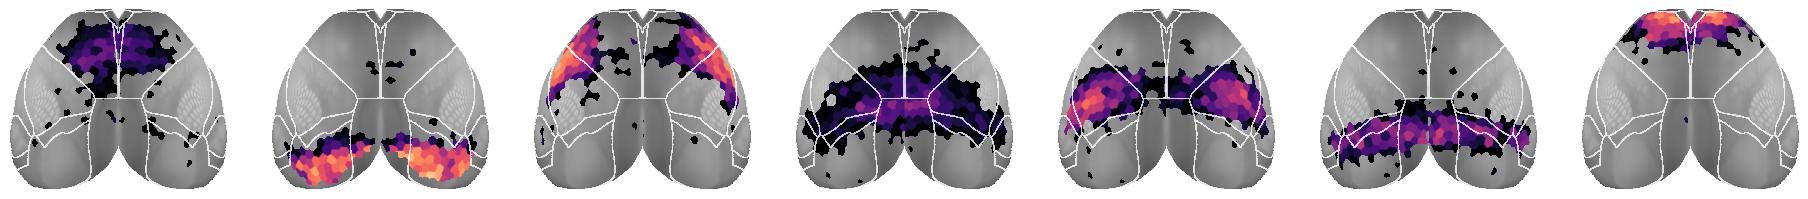

In [222]:
_ = sv.show(sv.pi, vmin=0.2, vmax=1.0, mask_thresh=1/7)

In [232]:
perm = {
    0: 5,
    4: 6,
    5: 4,
    6: 0,
}
perm = {
    i: perm.get(i, i)
    for i in range(7)
}
perm

{0: 5, 1: 1, 2: 2, 3: 3, 4: 6, 5: 4, 6: 0}

In [233]:
pi = dc(sv.pi)
pi = pi[list(perm.values())]

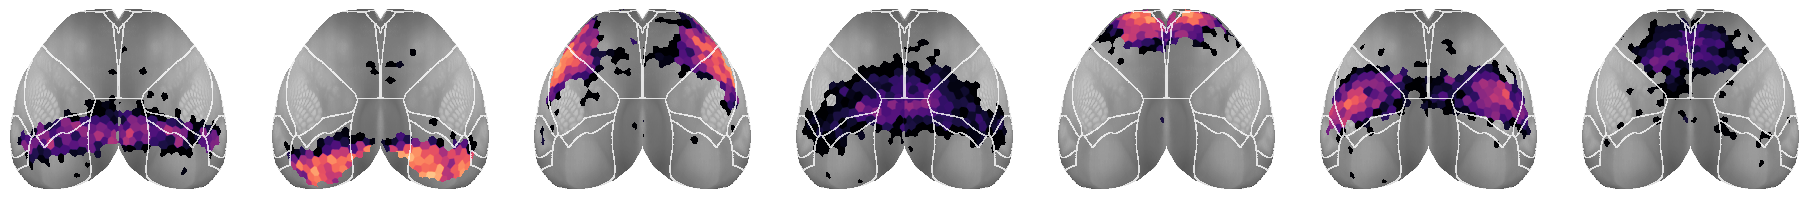

In [234]:
_ = sv.show(pi, vmin=0.2, vmax=1.0, mask_thresh=1/7)

### K = 8

In [235]:
kwargs['num_k'] = 8
sv = SVINET(perc='p15-sample', **kwargs)

In [236]:
_ = sv.load_runs()
len(sv._runs[sv.perc])

1000

In [237]:
_ = sv.fit_svinet()

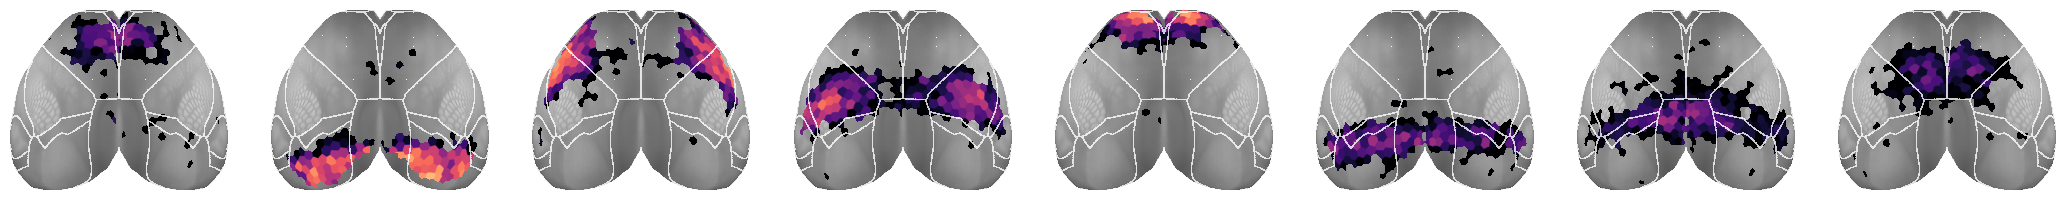

In [238]:
_ = sv.show(sv.pi, vmin=0.2, vmax=1.0, mask_thresh=1/7)

### K = 9

In [247]:
kwargs['num_k'] = 9
sv = SVINET(perc='p15-sample', **kwargs)

In [248]:
_ = sv.load_runs()
len(sv._runs[sv.perc])

1000

In [249]:
_ = sv.fit_svinet()

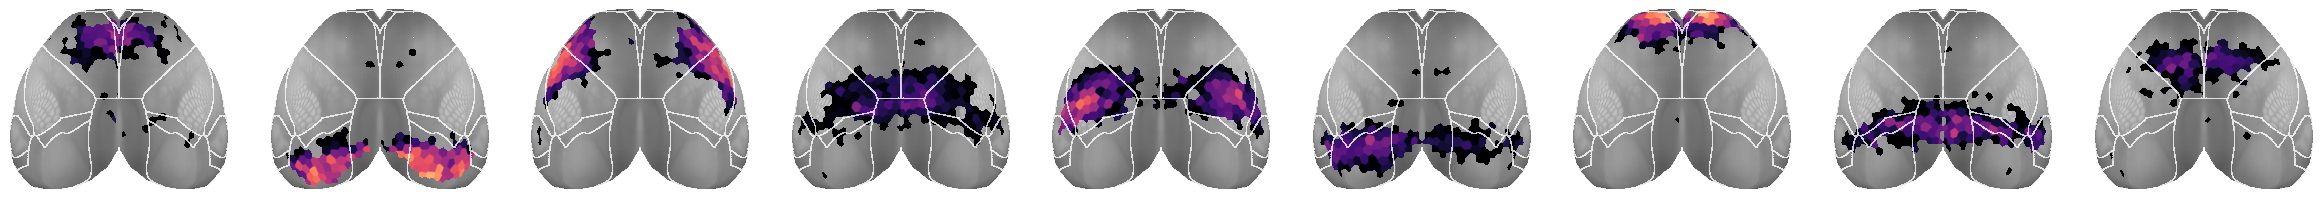

In [250]:
_ = sv.show(sv.pi, vmin=0.2, vmax=1.0, mask_thresh=1/7)

### K = 3

In [251]:
kwargs['num_k'] = 3
sv = SVINET(perc='p15-sample', **kwargs)

In [252]:
_ = sv.load_runs()
len(sv._runs[sv.perc])

1000

In [253]:
_ = sv.fit_svinet()

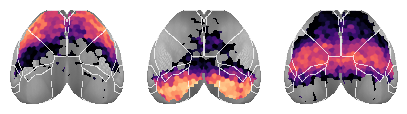

In [255]:
_ = sv.show(sv.pi, vmin=0.2, vmax=1.0, mask_thresh=1/7, figsize=(5, 4))

In [257]:
perm = {
    0: 2,
    2: 0,
}
perm = {
    i: perm.get(i, i)
    for i in range(3)
}
perm

{0: 2, 1: 1, 2: 0}

In [258]:
pi = dc(sv.pi)
pi = pi[list(perm.values())]

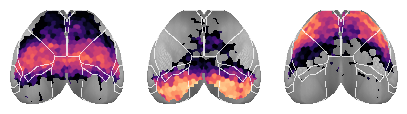

In [259]:
_ = sv.show(pi, vmin=0.2, vmax=1.0, mask_thresh=1/7, figsize=(5, 4))

### K = 4

In [266]:
kwargs['num_k'] = 4
sv = SVINET(perc='p15-sample', **kwargs)

In [267]:
_ = sv.load_runs()
len(sv._runs[sv.perc])

1000

In [268]:
_ = sv.fit_svinet()

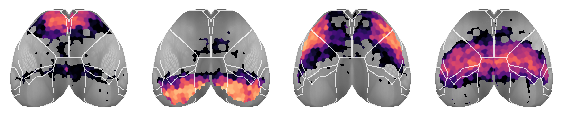

In [272]:
_ = sv.show(sv.pi, vmin=0.2, vmax=1.0, mask_thresh=1/7, figsize=(7, 4))

### K = 5

In [273]:
kwargs['num_k'] = 5
sv = SVINET(perc='p15-sample', **kwargs)

In [274]:
_ = sv.load_runs()
len(sv._runs[sv.perc])

1000

In [275]:
_ = sv.fit_svinet()

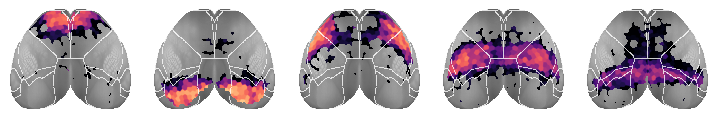

In [276]:
_ = sv.show(sv.pi, vmin=0.2, vmax=1.0, mask_thresh=1/7, figsize=(9, 4))

### K = 6

In [284]:
kwargs['num_k'] = 6
sv = SVINET(perc='p15-sample', **kwargs)

In [285]:
_ = sv.load_runs()
len(sv._runs[sv.perc])

1000

In [286]:
_ = sv.fit_svinet()

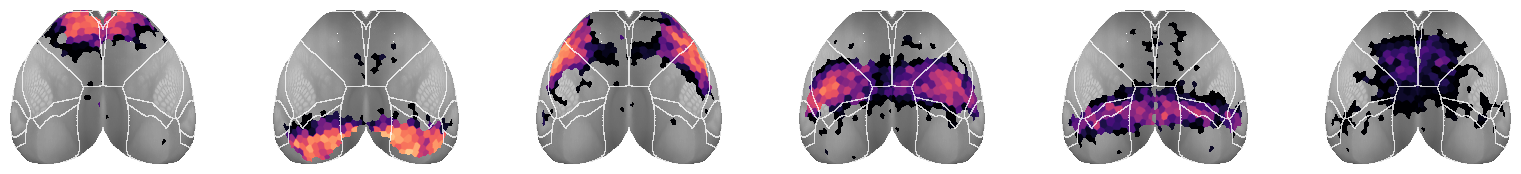

In [287]:
_ = sv.show(sv.pi, vmin=0.2, vmax=1.0, mask_thresh=1/7)

## How many animals used for grant

In [281]:
files

[
    'sub-DKI15_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI15_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI15_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI16_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI16_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI16_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI16_ses-4_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI16_ses-4_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI16_ses-4_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI20_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI20_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI20_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI21_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI21_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI21_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI26_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI26_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI26_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI27_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI27_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI27_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI32_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI32_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI32_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI33_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI33_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI33_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI34_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI34_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI34_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI35_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI35_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI35_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI41_ses-3_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI41_ses-3_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI41_ses-3_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
]

In [283]:
collections.Counter([f.split('_')[0] for f in files])

Counter({
    'sub-DKI15': 3,
    'sub-DKI16': 6,
    'sub-DKI20': 3,
    'sub-DKI21': 3,
    'sub-DKI26': 3,
    'sub-DKI27': 3,
    'sub-DKI32': 3,
    'sub-DKI33': 3,
    'sub-DKI34': 3,
    'sub-DKI35': 3,
    'sub-DKI41': 3
})

## DKI 5 animals

In [293]:
sub = 'DKI'
animals = [15, 16, 32, 33, 41]
files = sorted([
    f for f in os.listdir(raw_dir) if
    f"sub-{sub}" in f
    and 'T1w' not in f
    and 'ses-1' not in f
    and 'ses-2' not in f
])
files = [f for f in files if any(f"sub-DKI{i}" in f for i in animals)]
len(files)

18

In [294]:
data = []
for f in files:
    data.append(ants.image_read(pjoin(raw_dir, f)).numpy())
data = np.concatenate(data, axis=-1)

x = []
for r in regions:
    x.append(np.nanmean(data[roi == r], 0, keepdims=True))
x = np.concatenate(x)
x.shape

(542, 5332)

In [295]:
a, p = get_adj_mat(x, 'pearson', p_val=1)

k = 6
km = KMeans(n_clusters=k, random_state=0).fit(a)
partition = km.labels_ + 1

y = np.zeros(data.shape[:3])
for r, p in zip(regions, partition):
    y[roi == r] = p

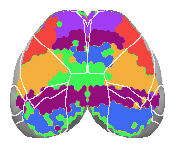

In [296]:
cmap = get_cluster_cmap(range(k))
_ = bs.show(partition, cmap=cmap, vmin=None, vmax=None, interpolation='none')

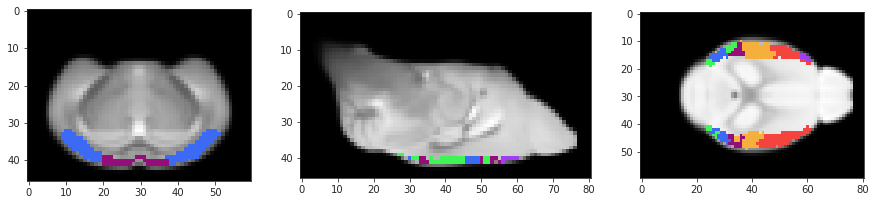

In [297]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[26], cmap='Greys_r')
axes[2].imshow(n162[:, 36, :], cmap='Greys_r')

axes[0].imshow(mwh(y[:, :, 40].T == 0, y[:, :, 40].T), cmap=cmap)
axes[1].imshow(mwh(y[26] == 0, y[26]), cmap=cmap)
axes[2].imshow(mwh(y[:, 36, :] == 0, y[:, 36, :]), cmap=cmap)

plt.show()

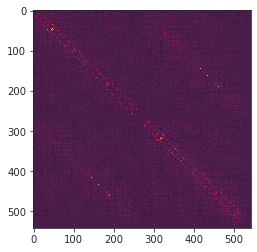

In [298]:
plt.imshow(a);

<AxesSubplot:ylabel='Count'>

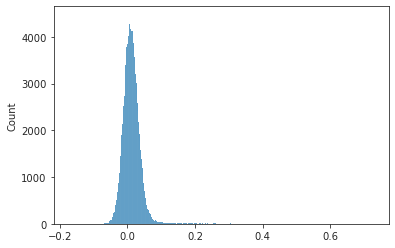

In [299]:
sns.histplot(a[a != 0])

In [300]:
th = calculate_threshold(a, 0.15, verbose=True).pop()
a_bin = dc(a)
a_bin[a <= th] = 0
a_bin[a > th] = 1

threshold = 0.034   /   density:  requested = 0.15000, result = 0.15000;

In [301]:
nan = np.isnan(a_bin).sum(0) == len(a_bin)
zero = np.nanmean(np.abs(a_bin), 0) == 0
good = np.logical_and(~nan, ~zero)
adj_eff = a_bin[good][:, good]

adj_eff.shape, nan.sum(), zero.sum()

((498, 498), 0, 44)

In [302]:
def _adj2graph(adj):
    a = adj.copy()
    a[np.isnan(a)] = 0
    g = nx.from_numpy_array(a)
    return g

In [303]:
a_final = dc(a)
a_final[a <= th] = 0
g = _adj2graph(a_final)

<matplotlib.image.AxesImage object at 0x7f641f066280>

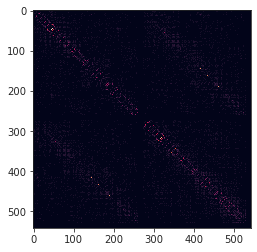

In [304]:
aaa = nx.adjacency_matrix(g).toarray()
plt.imshow(aaa)

<AxesSubplot:ylabel='Count'>

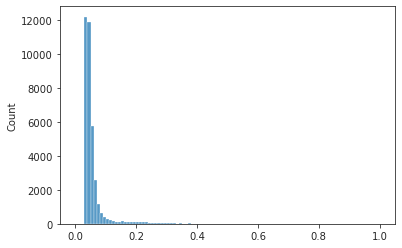

In [305]:
sns.histplot(aaa[aaa != 0], bins=np.linspace(0, 1, 101))

In [306]:
aaa.shape

(542, 542)

In [307]:
path = 'n-512*3_bp(0.008,0.2)_bold-lite_rest_pearson_sub-DKI5'
path = pjoin(mice.cfg.svinet_dir, path, 'real')
path

'/home/hadi/Documents/workspaces/svinet/n-512*3_bp(0.008,0.2)_bold-lite_rest_pearson_sub-DKI5/real'

In [308]:
save_graph(g, 15, path, 10, verbose=True)

[PROGRESS] 'p15-binary.txt' saved at
/home/hadi/Documents/workspaces/svinet/n-512*3_bp(0.008,0.2)_bold-lite_rest_pearson_sub-DKI5/
real/p15-binary

[PROGRESS] 'p15-sample.txt' saved at
/home/hadi/Documents/workspaces/svinet/n-512*3_bp(0.008,0.2)_bold-lite_rest_pearson_sub-DKI5/
real/p15-sample

## Fit SVINET

### K = 6

In [319]:
kwargs = {
    'mice': mice,
    'num_k': 6,
    'key': 'sub-DKI5',
    'mode': 'bold-lite',
    'verbpose': True,
}
sv = SVINET(perc='p15-sample', **kwargs)

In [320]:
_ = sv.load_runs()
len(sv._runs[sv.perc])

1000

In [321]:
_ = sv.fit_svinet()

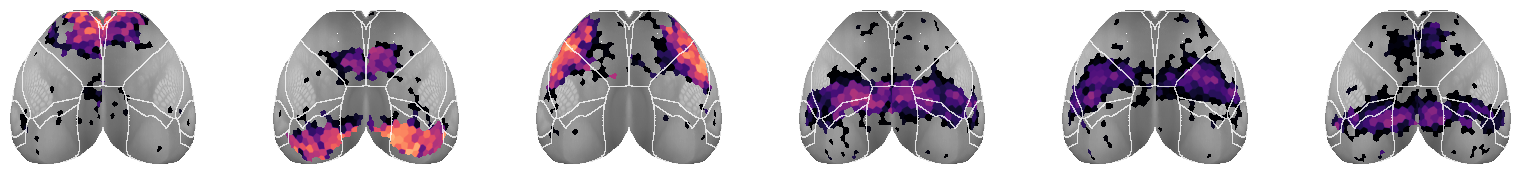

In [322]:
_ = sv.show(sv.pi, vmin=0.2, vmax=1.0, mask_thresh=1/7)

### K = 7

In [323]:
kwargs = {
    'mice': mice,
    'num_k': 7,
    'key': 'sub-DKI5',
    'mode': 'bold-lite',
    'verbpose': True,
}
sv = SVINET(perc='p15-sample', **kwargs)

In [324]:
_ = sv.load_runs()
len(sv._runs[sv.perc])

159

In [325]:
_ = sv.fit_svinet()

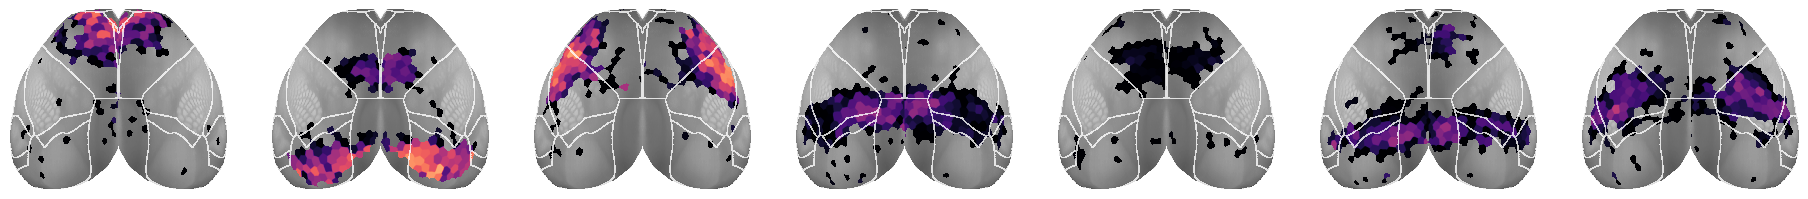

In [326]:
_ = sv.show(sv.pi, vmin=0.2, vmax=1.0, mask_thresh=1/7)

In [327]:
perm = {
    0: 5,
    6: 4,
    5: 6,
    4: 0,
}
perm = {
    i: perm.get(i, i)
    for i in range(7)
}
perm

{0: 5, 1: 1, 2: 2, 3: 3, 4: 0, 5: 6, 6: 4}

In [328]:
pi = dc(sv.pi)
pi = pi[list(perm.values())]

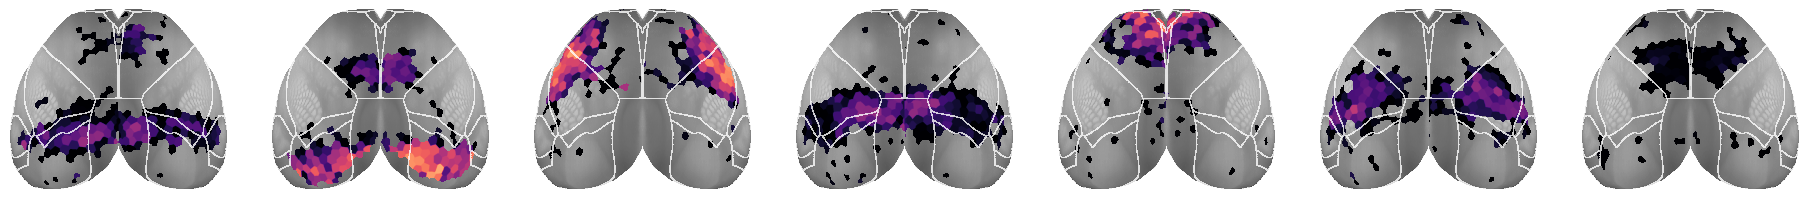

In [329]:
_ = sv.show(pi, vmin=0.2, vmax=1.0, mask_thresh=1/7)